In [20]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np

In [8]:
"https://www.ssa.gov/international/coc-docs/states.html"

'https://www.ssa.gov/international/coc-docs/states.html'

In [9]:
source = requests.get('https://www.ssa.gov/international/coc-docs/states.html').text
soup = BeautifulSoup(source, 'lxml')

In [31]:
row = soup.find_all("tr")

state_ab = []
for i in row[1:]:
    string = i.get_text()
    a = string.split("\n")
    state_ab.append(a)

In [32]:
state_ab_df = pd.DataFrame(state_ab, columns=['Empty','State','Abbreviation','Empty']).dropna()

In [33]:
state_abbreviation = state_ab_df[['State','Abbreviation']]

In [34]:
state_abbreviation.to_csv('state_abbreviation.csv')

In [35]:
rand_numbers_df = pd.DataFrame(np.random.randint(0,100, size=len(state_abbreviation)),columns=['rand_number'])

In [38]:
states_df = pd.concat([state_abbreviation,rand_numbers_df], axis=1)

In [37]:
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

In [43]:
states_df['Abbreviation'] = 

' AS'

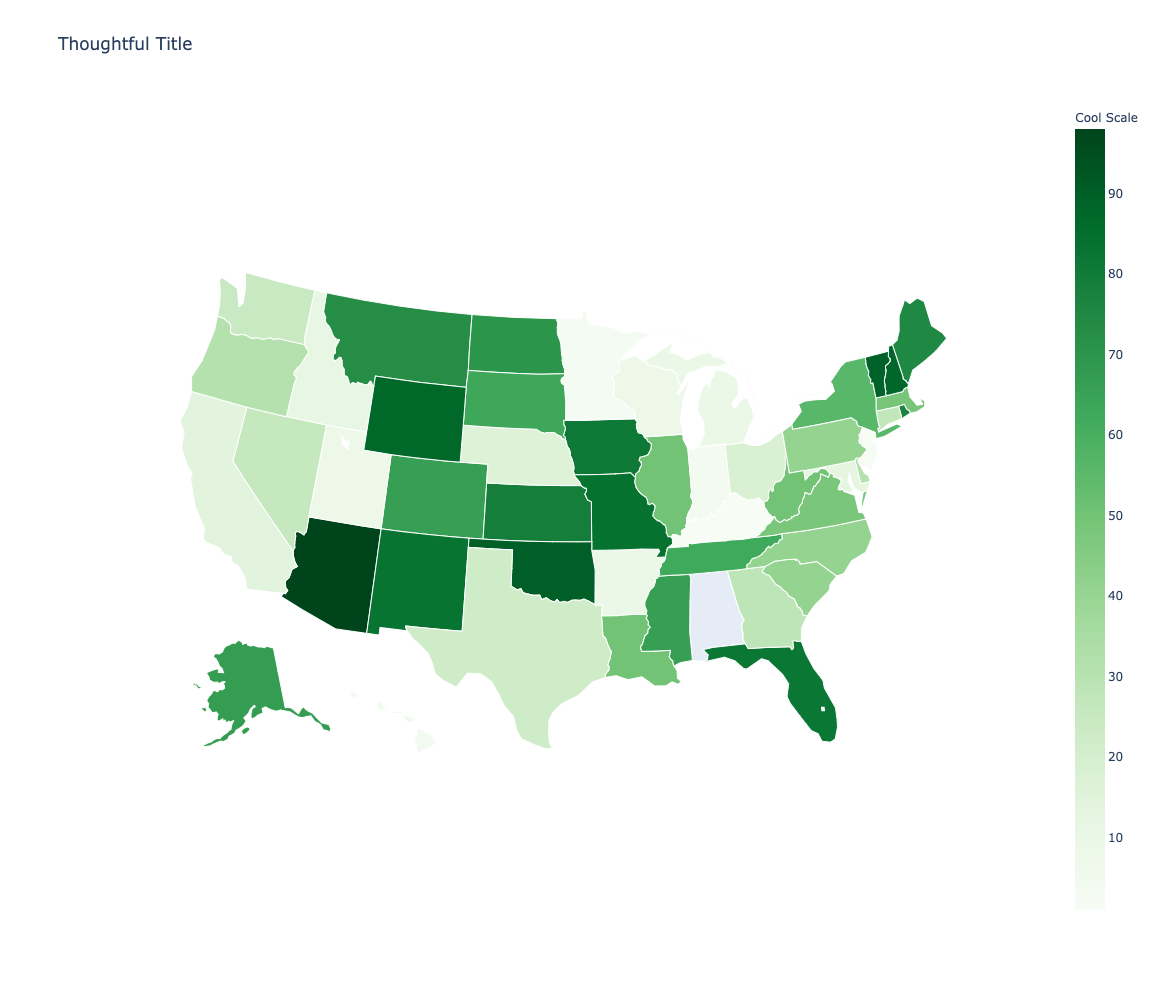

In [44]:
df = states_df

df['text'] = df['State'] + '<br>' + \
    'Random Number ' + df['rand_number'].astype('str') + '<br>'

fig = go.Figure(data=go.Choropleth(
    locations=df['Abbreviation'].str.strip(),
    z=df['rand_number'].astype(float),
    locationmode='USA-states',
    colorscale='Greens',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Cool Scale"
))

fig.update_layout(
    title_text='Thoughtful Title',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
        width=1500, height=1000
)

pio.write_html(fig, 'usa_kpi.html')

fig.show()